# Problem statement
The data was derived at Kaggle. The assignment sought to predict if the patient was suffering from diabetes or not. 

In [134]:
import pandas as pd

In [135]:
diabetes = pd.read_csv("C:\pydatafiles\diabetes.csv")

In [136]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [137]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [140]:
diabetes.shape

(768, 9)

In [141]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [142]:
#Cleaning Data
cols_to_norm=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x:(x-x.min()/x.max()-x.min()))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.516769,28.740741,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.240769,9.740741,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.561769,10.740741,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.056769,-0.259259,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.177769,11.740741,1


# Data Visualization

In [143]:
import plotly.express as px
fig = px.scatter_matrix(diabetes, dimensions=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"],hover_name="Outcome", range_color="green")
fig.show()

<AxesSubplot:>

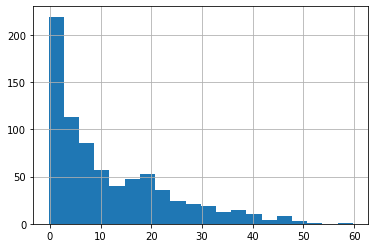

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [145]:
import seaborn as sns

In [146]:
fig = px.bar(diabetes, x="Age", y="Pregnancies", color="Outcome",pattern_shape="Outcome", pattern_shape_sequence=[".", "x", "+"], hover_name="BMI")
fig.show()

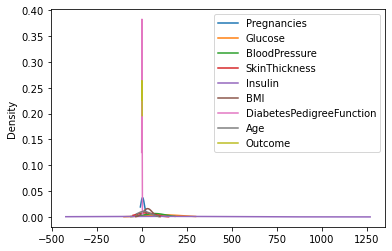

<Figure size 1440x720 with 0 Axes>

In [147]:
ax=diabetes.plot.kde(bw_method=3)
fig = plt.figure(figsize=(20,10))

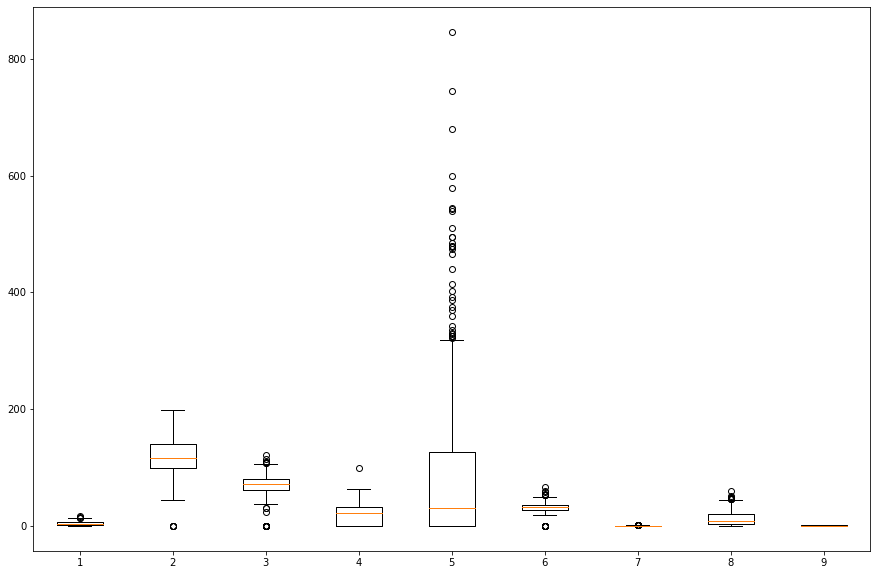

In [148]:
fig = plt.figure(figsize=(15, 10))
plt.boxplot(diabetes)
plt.show()

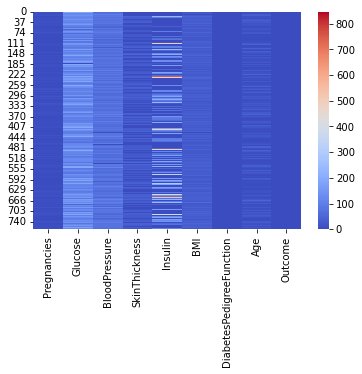

In [149]:
ax=sns.heatmap(diabetes,cmap="coolwarm")
            

In [150]:
fig = px.violin(diabetes, y="DiabetesPedigreeFunction",x="Age", color="Outcome", box=True, points="all",hover_data=diabetes.columns)
fig.show()

# Importing tensorflow

In [151]:
import tensorflow as tf

Preg= tf.feature_column.numeric_column("Pregnancies")
Gluc= tf.feature_column.numeric_column("Glucose")
Bld_Press= tf.feature_column.numeric_column("BloodPressure")
Sk_Thic=tf.feature_column.numeric_column("SkinThickness")
Insulin=tf.feature_column.numeric_column("Insulin")
BMI=tf.feature_column.numeric_column("BMI")
Pedigree=tf.feature_column.numeric_column("DiabetesPedigreeFunction")
Age=tf.feature_column.numeric_column("Age")

In [152]:
age_buckets= tf.feature_column.bucketized_column(Age, boundaries=[20,30,40,50,70,80])
feat_cols=[Preg, Gluc,Bld_Press,Sk_Thic,Insulin,BMI,Pedigree,age_buckets]

In [153]:
x_data=diabetes.drop('Outcome',axis=1)
labels=diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test=train_test_split(x_data, labels, test_size=0.4,random_state=64)

# Applying Input function

In [154]:
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=Y_train, batch_size=10,num_epochs=50, shuffle=True)

# Creating the Model

In [155]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)
model.train(input_fn=input_func,steps=50)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KENBWI~1\\AppData\\Local\\Temp\\tmpd19mra6e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tens

# Prediction

In [156]:
pred_input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1,shuffle=False)
predictions=model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KENBWI~1\AppData\Local\Temp\tmpd19mra6e\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-16.012207], dtype=float32),
  'logistic': array([1.1116979e-07], dtype=float32),
  'probabilities': array([9.9999988e-01, 1.1116979e-07], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-13.479235], dtype=float32),
  'logistic': array([1.3997231e-06], dtype=float32),
  'probabilities': array([9.9999857e-01, 1.3997231e-06], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-9.823546], dtype=float32),
  'logistic': array([5.4158234e-05], dtype=float32),
  'probabilities': array([9.9994588e-01, 5.4158234e-05], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b

# Evaluate the Model

In [157]:
eval_input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results= model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-05-11T00:06:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KENBWI~1\AppData\Local\Temp\tmpd19mra6e\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.13622s
INFO:tensorflow:Finished evaluation at 2023-05-11-00:06:24
INFO:tensorflow:Saving dict for global step 50: accuracy = 0.6525974, accuracy_baseline = 0.66233766, auc = 0.5285399, auc_precision_recall = 0.38401, average_loss = 2.9793732, global_step = 50, label/mean = 0.33766234, loss = 2.9620855, precision = 0.44, prediction/mean = 0.08439002, recall = 0.10576923
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 50: C:\Users\KENBWI~1\AppData\Local\Temp\tmpd19mra6e\model.ckpt-50


{'accuracy': 0.6525974,
 'accuracy_baseline': 0.66233766,
 'auc': 0.5285399,
 'auc_precision_recall': 0.38401,
 'average_loss': 2.9793732,
 'label/mean': 0.33766234,
 'loss': 2.9620855,
 'precision': 0.44,
 'prediction/mean': 0.08439002,
 'recall': 0.10576923,
 'global_step': 50}